EXAM_SOLUTION

INTRO

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [5]:
url = 'corona_data.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157360 entries, 0 to 157359
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   City_Name                   157360 non-null  object 
 1   City_Code                   157360 non-null  int64  
 2   Date                        157360 non-null  object 
 3   verified_cases              157360 non-null  int64  
 4   recovered                   157360 non-null  int64  
 5   deaths                      157360 non-null  int64  
 6   number_of_tests             157360 non-null  int64  
 7   number_of_diagnostic_tests  157360 non-null  int64  
 8   colour                      157360 non-null  object 
 9   final_score                 157360 non-null  float64
 10  month                       157360 non-null  int64  
 11  year                        157360 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 14.4+ MB


Q1

In [6]:
##data['City_Code'].sort_values().unique()
new_df= data.loc[(data['City_Code'] == 831) & (data['year'] == 2021)]
new_df.iloc[0:2,0:2]

,City_Name,City_Code
64696,ירוחם,831
64697,ירוחם,831


Q2

In [7]:
new_df.groupby('month')[['verified_cases','recovered']].max().reset_index()

,month,verified_cases,recovered
0,1,29,38
1,2,16,16
2,3,16,14
3,4,3,3
4,5,2,1
5,6,0,1
6,7,5,2
7,8,34,20
8,9,25,37


Q3

array([[<AxesSubplot:title={'center':'number_of_tests'}>,
        <AxesSubplot:title={'center':'verified_cases'}>]], dtype=object)

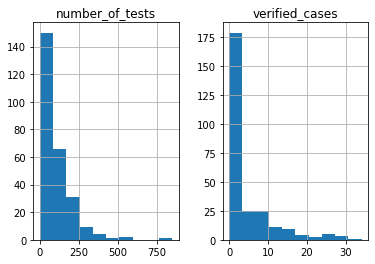

In [8]:
new_df[['number_of_tests','verified_cases']].hist()

In [9]:
new_df[['number_of_tests','verified_cases']].corr(method= 'kendall')

,number_of_tests,verified_cases
number_of_tests,1.000000,0.637691
verified_cases,0.637691,1.000000


In [10]:
hue_order = ["green", "orange","yellow","red"]
colors = {
    "green":"green",
    "orange":"orange",
    "yellow":"yellow",
    "red":"red"
}

<AxesSubplot:xlabel='number_of_tests', ylabel='verified_cases'>

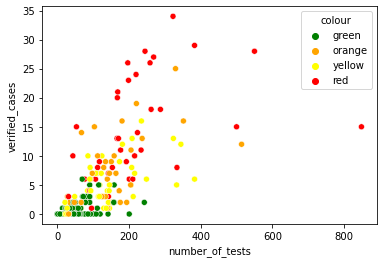

In [11]:
sns.scatterplot(data= new_df, x= 'number_of_tests', y='verified_cases', hue= 'colour', hue_order= hue_order , palette= colors)

Q4

In [16]:
new_df.groupby(['month','colour'])[['colour']].count().unstack()

colour                    
colour  green orange   red yellow
month                            
1         NaN   12.0  19.0    NaN
2         6.0    5.0   5.0   12.0
3        15.0    5.0   NaN   11.0
4        30.0    NaN   NaN    NaN
5        31.0    NaN   NaN    NaN
6        30.0    NaN   NaN    NaN
7        29.0    NaN   NaN    2.0
8         NaN   11.0  11.0    9.0
9         NaN    8.0   3.0   10.0

Q5

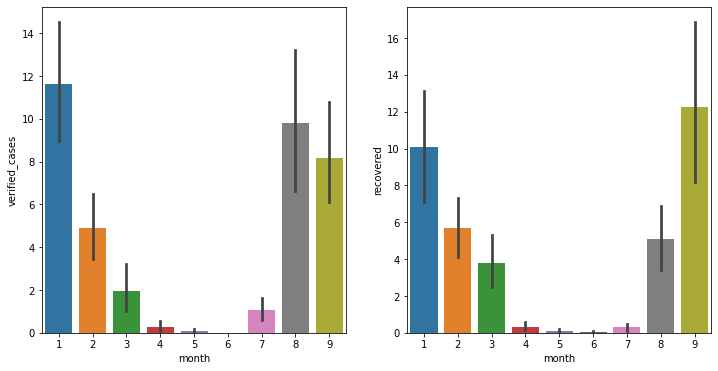

In [21]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x= 'month', y='verified_cases', data= new_df, ax= axes[0])
sns.barplot(x= 'month', y='recovered', data= new_df, ax= axes[1])
plt.show()

Q6

In [25]:
new_df= new_df.dropna()

In [30]:
features= ['City_Code', 'recovered', 'verified_cases']

In [31]:
X = new_df[features]
y = new_df['colour']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
model = sk.tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
sk.metrics.accuracy_score(pred, y_test)


0.6

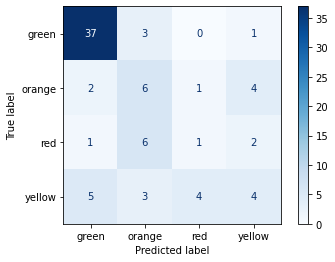

In [34]:
sk.metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)